# IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# READ THE CSV FILE

In [2]:
data = pd.read_csv(r"C:\Users\mohda\Downloads\Gold.csv") #to read csv files

# head()

In [3]:
data.head() #returns starting rows 5 rows (default value)

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
0,"Dec 06, 1994",375.8,375.6,376.5,375.1,0.99,0.0008
1,"Dec 07, 1994",376.1,377.0,377.5,375.1,1.88,0.0008
2,"Dec 08, 1994",376.6,375.3,376.7,374.8,0.48,0.0013
3,"Dec 09, 1994",377.0,375.6,377.0,375.5,0.38,0.0011
4,"Dec 12, 1994",377.5,376.8,377.8,376.5,0.07,0.0013


# tail()

In [6]:
data.tail()

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
6881,"Dec 01, 2021",1784.30,1777.40,1795.7,1773.70,180.34,0.0044
6882,"Dec 02, 2021",1762.70,1783.80,1785.2,1762.20,172.72,-0.0121
6883,"Dec 03, 2021",1783.90,1769.40,1788.0,1766.00,NaN,0.0120
6884,"Dec 05, 2021",1783.80,1784.45,1789.1,1781.60,NaN,-0.0001
6885,"Dec 06, 2021",1778.65,1783.85,1788.3,1776.65,NaN,-0.0029


# columns

In [7]:
data.columns

Index(['Date', 'Price ($US)', 'Open ($US)', 'High ($US)', 'Low ($US)',
       'Vol (in thousand)', 'Change %'],
      dtype='object')

# info()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6886 entries, 0 to 6885
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               6886 non-null   object 
 1   Price ($US)        6886 non-null   float64
 2   Open ($US)         6886 non-null   float64
 3   High ($US)         6886 non-null   float64
 4   Low ($US)          6886 non-null   float64
 5   Vol (in thousand)  5584 non-null   float64
 6   Change %           6886 non-null   float64
dtypes: float64(6), object(1)
memory usage: 376.7+ KB


# shape

In [9]:
data.shape

(6886, 7)

# size

In [10]:
data.size

48202

# Q. 1. Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [4]:
#duplicated() - duplicated() is used to check duplicate records from a dataframe

data[data.duplicated()]

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %


# Q. 2. Is there any Null Value present in any column ? If yes then replace all the null values with 0

In [6]:
# isnull() - checks whether NaN/NA/NAT values present in the dataframe or not

data.isnull().sum()

Date                    0
Price ($US)             0
Open ($US)              0
High ($US)              0
Low ($US)               0
Vol (in thousand)    1302
Change %                0
dtype: int64

In [9]:
data.fillna(0, inplace=True) #fillna() is used to fill NA/NaN/NAT values with some specific value

In [10]:
data.isnull().sum()

Date                 0
Price ($US)          0
Open ($US)           0
High ($US)           0
Low ($US)            0
Vol (in thousand)    0
Change %             0
dtype: int64

# Q. 3. Display the total volume of gold sold for every year and also show the data for the last five years in a horizontal bar chart

In [11]:
data.head()

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
0,"Dec 06, 1994",375.8,375.6,376.5,375.1,0.99,0.0008
1,"Dec 07, 1994",376.1,377.0,377.5,375.1,1.88,0.0008
2,"Dec 08, 1994",376.6,375.3,376.7,374.8,0.48,0.0013
3,"Dec 09, 1994",377.0,375.6,377.0,375.5,0.38,0.0011
4,"Dec 12, 1994",377.5,376.8,377.8,376.5,0.07,0.0013


In [4]:
data["Date"] = pd.to_datetime(data["Date"])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6886 entries, 0 to 6885
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               6886 non-null   datetime64[ns]
 1   Price ($US)        6886 non-null   float64       
 2   Open ($US)         6886 non-null   float64       
 3   High ($US)         6886 non-null   float64       
 4   Low ($US)          6886 non-null   float64       
 5   Vol (in thousand)  6886 non-null   float64       
 6   Change %           6886 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 376.7 KB


In [15]:
data.head()

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
0,1994-12-06,375.8,375.6,376.5,375.1,0.99,0.0008
1,1994-12-07,376.1,377.0,377.5,375.1,1.88,0.0008
2,1994-12-08,376.6,375.3,376.7,374.8,0.48,0.0013
3,1994-12-09,377.0,375.6,377.0,375.5,0.38,0.0011
4,1994-12-12,377.5,376.8,377.8,376.5,0.07,0.0013


In [25]:
#pivot_table()

total_vol = data.pivot_table(index=[data["Date"].dt.year], values = "Vol (in thousand)",aggfunc="sum")
display(total_vol)

,Vol (in thousand)
Date,
1994,4.20
1995,151.07
1996,186.99
1997,290.44
1998,219.78
1999,144.91
2000,138.12
2001,141.62
2002,139.05


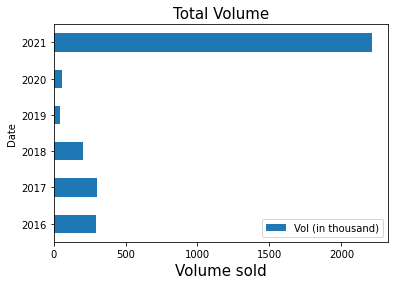

In [30]:
total_vol.tail(6).plot(kind="barh")
plt.xlabel("Volume sold", fontsize=15)
plt.title("Total Volume", fontsize=15)
plt.show()

# Q. 4. Display the highest open, high, low, close price of gold for the starting 6 years and also show the data in a horizontal bar chart

In [31]:
data.head()

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
0,1994-12-06,375.8,375.6,376.5,375.1,0.99,0.0008
1,1994-12-07,376.1,377.0,377.5,375.1,1.88,0.0008
2,1994-12-08,376.6,375.3,376.7,374.8,0.48,0.0013
3,1994-12-09,377.0,375.6,377.0,375.5,0.38,0.0011
4,1994-12-12,377.5,376.8,377.8,376.5,0.07,0.0013


In [35]:
high_data = data.pivot_table(index=data["Date"].dt.year, values=["Price ($US)","Open ($US)","High ($US)","Low ($US)"],aggfunc="max").head(6)
display(high_data)

,High ($US),Low ($US),Open ($US),Price ($US)
Date,,,,
1994,383.6,383.1,383.1,383.7
1995,401.0,395.5,396.3,395.4
1996,417.5,412.8,415.0,414.7
1997,365.7,365.7,365.7,365.7
1998,315.6,313.1,315.6,314.5
1999,327.5,322.0,324.0,324.5


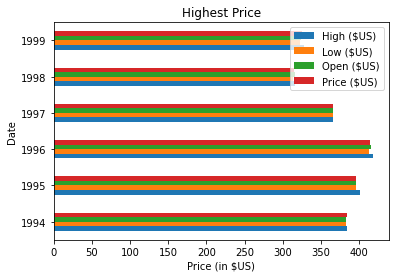

In [39]:
high_data.plot(kind="barh")
plt.title("Highest Price")
plt.xlabel("Price (in $US)")
plt.show()

# Q. 5. Display the low open, high, low, close price of gold for the starting 6 years and also show the data in a horizontal bar chart

In [6]:
low_data = data.pivot_table(index=[data["Date"].dt.year], values=["High ($US)","Low ($US)","Open ($US)","Price ($US)"],aggfunc="min").head(6)
display(low_data)

,High ($US),Low ($US),Open ($US),Price ($US)
Date,,,,
1994,376.5,374.8,375.3,375.8
1995,373.1,372.0,373.1,371.2
1996,368.3,366.0,368.0,368.0
1997,283.7,281.5,282.8,282.8
1998,275.6,275.6,275.6,274.6
1999,252.9,252.5,252.9,253.0


<AxesSubplot:ylabel='Date'>

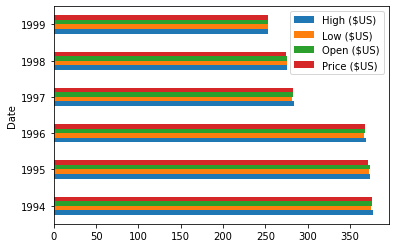

In [7]:
low_data.plot(kind="barh")

# Q. 6. Display the average open, high, low, close price of gold for the starting 6 years and also show the data in a horizontal bar chart

In [9]:
avg_data = data.pivot_table(index=[data["Date"].dt.year], values=["High ($US)","Low ($US)","Open ($US)","Price ($US)"], aggfunc="mean").head(6)
display(avg_data)

,High ($US),Low ($US),Open ($US),Price ($US)
Date,,,,
1994,380.233333,379.155556,379.644444,379.633333
1995,384.942688,384.184585,384.553360,384.484585
1996,388.333597,387.498024,387.987352,387.891304
1997,332.075000,330.922619,331.612302,331.435317
1998,294.898805,293.691235,294.321116,294.214343
1999,279.596400,278.329600,279.009600,278.890000


<AxesSubplot:ylabel='Date'>

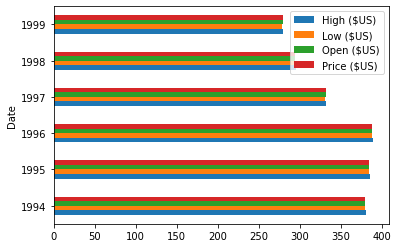

In [13]:
avg_data.plot(kind="barh")

# Q. 7. Show only the data of year 2010

In [14]:
data.head()

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
0,1994-12-06,375.8,375.6,376.5,375.1,0.99,0.0008
1,1994-12-07,376.1,377.0,377.5,375.1,1.88,0.0008
2,1994-12-08,376.6,375.3,376.7,374.8,0.48,0.0013
3,1994-12-09,377.0,375.6,377.0,375.5,0.38,0.0011
4,1994-12-12,377.5,376.8,377.8,376.5,0.07,0.0013


In [17]:
pd.set_option("max_row", None)

In [25]:
data[(data["Date"].dt.year == 2010) & (data["Date"].dt.month == 10)]

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
3966,2010-10-01,1316.1,1309.0,1320.0,1309.0,0.15,0.0063
3967,2010-10-04,1315.4,1318.3,1319.1,1312.0,0.10,-0.0005
3968,2010-10-05,1338.9,1312.9,1341.1,1312.9,0.20,0.0179
3969,2010-10-06,1346.4,1339.1,1349.0,1339.0,0.22,0.0056
3970,2010-10-07,1333.9,1347.9,1363.2,1325.7,0.26,-0.0093
3971,2010-10-08,1344.2,1333.5,1348.4,1325.0,0.08,0.0077
3972,2010-10-11,1353.3,1346.7,1353.7,1344.0,0.08,0.0068
3973,2010-10-12,1345.7,1346.9,1352.2,1343.6,0.11,-0.0056
3974,2010-10-13,1369.5,1356.4,1374.0,1355.1,0.25,0.0177
3975,2010-10-14,1376.7,1372.8,1383.9,1371.3,0.11,0.0053


In [19]:
pd.reset_option("max_row")

# Q. 8.  Display the record of the lowest closing price

In [22]:
data.head()

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
0,1994-12-06,375.8,375.6,376.5,375.1,0.99,0.0008
1,1994-12-07,376.1,377.0,377.5,375.1,1.88,0.0008
2,1994-12-08,376.6,375.3,376.7,374.8,0.48,0.0013
3,1994-12-09,377.0,375.6,377.0,375.5,0.38,0.0011
4,1994-12-12,377.5,376.8,377.8,376.5,0.07,0.0013


In [34]:
#sort_values
data.sort_values("Price ($US)").head(1)

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
1189,1999-08-25,253.0,254.0,254.0,252.5,0.05,-0.002


# Q. 9. Display the record of the highest closing price

In [35]:
data.sort_values("Price ($US)", ascending=False).head(1)

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
6533,2020-08-06,2115.2,2086.7,2115.0,2085.9,0.0,0.0105


# Q. 10. Display only the record where Change % is in negative

In [36]:
data.head()

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
0,1994-12-06,375.8,375.6,376.5,375.1,0.99,0.0008
1,1994-12-07,376.1,377.0,377.5,375.1,1.88,0.0008
2,1994-12-08,376.6,375.3,376.7,374.8,0.48,0.0013
3,1994-12-09,377.0,375.6,377.0,375.5,0.38,0.0011
4,1994-12-12,377.5,376.8,377.8,376.5,0.07,0.0013


In [41]:
data[data["Change %"] < 0]

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
8,1994-12-16,378.60,380.50,380.5,379.00,0.04,-0.0042
11,1994-12-21,381.60,382.00,382.0,381.50,0.03,-0.0005
12,1994-12-22,381.00,381.50,381.5,381.50,0.05,-0.0016
13,1994-12-23,380.40,381.00,381.0,380.40,0.02,-0.0016
16,1994-12-29,382.70,382.70,382.7,382.70,NaN,-0.0026
...,...,...,...,...,...,...,...
6879,2021-11-29,1785.20,1795.20,1801.5,1782.00,151.37,-0.0016
6880,2021-11-30,1776.50,1786.90,1811.4,1771.20,242.86,-0.0049
6882,2021-12-02,1762.70,1783.80,1785.2,1762.20,172.72,-0.0121
6884,2021-12-05,1783.80,1784.45,1789.1,1781.60,NaN,-0.0001


# Q. 11. Display the highest closing price after the year 2018. Also show the data in a bar chart

In [42]:
data.head()

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
0,1994-12-06,375.8,375.6,376.5,375.1,0.99,0.0008
1,1994-12-07,376.1,377.0,377.5,375.1,1.88,0.0008
2,1994-12-08,376.6,375.3,376.7,374.8,0.48,0.0013
3,1994-12-09,377.0,375.6,377.0,375.5,0.38,0.0011
4,1994-12-12,377.5,376.8,377.8,376.5,0.07,0.0013


In [49]:
x = data[data["Date"].dt.year > 2018]
display(x)
xyz = data.pivot_table(index=[x["Date"].dt.year], values="Price ($US)", aggfunc="max")
display(xyz)

,Date,Price ($US),Open ($US),High ($US),Low ($US),Vol (in thousand),Change %
6109,2019-01-01,1283.35,1284.70,1284.75,1282.85,NaN,-0.0473
6110,2019-01-02,1349.50,1349.50,1349.50,1349.50,0.10,0.0515
6111,2019-01-03,1359.80,1359.80,1359.80,1359.80,0.01,0.0076
6112,2019-01-04,1351.00,1351.80,1351.80,1351.80,0.00,-0.0065
6113,2019-01-07,1355.20,1355.20,1355.20,1355.20,0.01,0.0031
...,...,...,...,...,...,...,...
6881,2021-12-01,1784.30,1777.40,1795.70,1773.70,180.34,0.0044
6882,2021-12-02,1762.70,1783.80,1785.20,1762.20,172.72,-0.0121
6883,2021-12-03,1783.90,1769.40,1788.00,1766.00,NaN,0.0120
6884,2021-12-05,1783.80,1784.45,1789.10,1781.60,NaN,-0.0001


,Price ($US)
Date,
2019.0,1593.3
2020.0,2115.2
2021.0,1974.9


<AxesSubplot:ylabel='Date'>

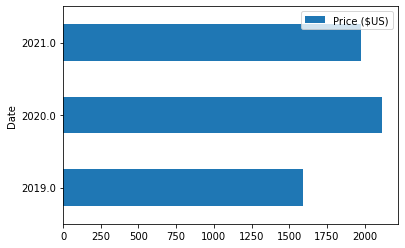

In [51]:
xyz.plot(kind="barh")